<a href="https://colab.research.google.com/github/JoehIreri/Election-Sentiment-Analysis/blob/main/ELECTION_SENTIMENT_ANALYSIS_USING_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A predictive model that can identify and classify voters based on their twitter behaviours and interactions

In [1]:
!pip install TextBlob

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS # generate visual representations of text data

In [4]:
trump=pd.read_csv("/content/Trumpall2.csv")
biden=pd.read_csv("/content/Bidenall2.csv")

In [5]:
trump.head()

,user,text
0,manny_rosen,@sanofi please tell us how many shares the Cr...
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P..."
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...
4,James09254677,After 4 years you think you would have figure...


In [6]:
biden.head()

,user,text
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...
2,OldlaceA,@JoeBiden So did Lying Barr
3,penblogger,@JoeBiden It's clear you didnt compose this tw...
4,Aquarian0264,@JoeBiden I will vote in person thank you.


In [29]:
from textblob import TextBlob

trump_txt=TextBlob(trump["text"][500])
print(trump["text"][500])
print("trump:", trump_txt.sentiment)


biden_txt=TextBlob(trump["text"][500])
print(biden["text"][500])
print("biden:", biden_txt.sentiment)

 didn't our very own government fine and reprimand our racist leader and his racist daddy fred for… https://t.co/Pwy354lioG
trump: Sentiment(polarity=0.5983333333333334, subjectivity=0.75)
@JoeBiden ... and maybe some kind of healthcare that covers everybody... not that the thought of millions in hospit… https://t.co/v3QKITvlPJ
biden: Sentiment(polarity=0.5983333333333334, subjectivity=0.75)


In [30]:
def pol(text):
  return TextBlob(text).sentiment.polarity

trump["Polarity"]=trump["text"].apply(pol)
trump.tail()

,user,text,Polarity
2783,4diva63,"@realDonaldTrump For the 1/100 time, absentee ...",0.000
2784,hidge826,@realDonaldTrump If you’re so scared of losing...,0.000
2785,SpencerRossy,@realDonaldTrump I rarely get involved with fo...,0.225
2786,ScoobyMcpherson,@realDonaldTrump This is the moment when Trump...,0.000
2787,bjklinz,"@realDonaldTrump I’m sorry, Donald. No. #POTUS",-0.500


In [32]:
trump["Polarity"]=trump["text"].apply(pol)
trump.tail()

,user,text,Polarity
2783,4diva63,"@realDonaldTrump For the 1/100 time, absentee ...",0.000
2784,hidge826,@realDonaldTrump If you’re so scared of losing...,0.000
2785,SpencerRossy,@realDonaldTrump I rarely get involved with fo...,0.225
2786,ScoobyMcpherson,@realDonaldTrump This is the moment when Trump...,0.000
2787,bjklinz,"@realDonaldTrump I’m sorry, Donald. No. #POTUS",-0.500


In [33]:
trump["sentiment"]=np.where(trump["Polarity"]>0,"Positive","Negative")
trump["sentiment"][trump["Polarity"]==0]="Neutral"
trump.tail()

<ipython-input-33-78c6222bd4ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump["sentiment"][trump["Polarity"]==0]="Neutral"


,user,text,Polarity,sentiment
2783,4diva63,"@realDonaldTrump For the 1/100 time, absentee ...",0.000,Neutral
2784,hidge826,@realDonaldTrump If you’re so scared of losing...,0.000,Neutral
2785,SpencerRossy,@realDonaldTrump I rarely get involved with fo...,0.225,Positive
2786,ScoobyMcpherson,@realDonaldTrump This is the moment when Trump...,0.000,Neutral
2787,bjklinz,"@realDonaldTrump I’m sorry, Donald. No. #POTUS",-0.500,Negative


In [39]:
biden["Polarity"]=biden["text"].apply(pol)
biden.tail()

,user,text,Polarity
2535,meryn1977,@JoeBiden You'll just try to calm those waters...,0.15
2536,BSNelson114,@JoeBiden 96 days 96 dias #VoteJoeBiden2020 #...,0.00
2537,KenCapel,@JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...,0.00
2538,LeslyeHale,@JoeBiden Trump wants our children back at sch...,0.10
2539,rerickre,"@JoeBiden ... and I know, because it’s much co...",0.20


In [36]:
print(biden.columns)

Index(['user', 'text'], dtype='object')


In [40]:
biden["sentiment"]=np.where(biden["Polarity"]>0,"Positive","Negative")
biden["sentiment"][biden["Polarity"]==0]="Neutral"
biden.tail()

<ipython-input-40-b0788d6bf0f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biden["sentiment"][biden["Polarity"]==0]="Neutral"


,user,text,Polarity,sentiment
2535,meryn1977,@JoeBiden You'll just try to calm those waters...,0.15,Positive
2536,BSNelson114,@JoeBiden 96 days 96 dias #VoteJoeBiden2020 #...,0.00,Neutral
2537,KenCapel,@JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...,0.00,Neutral
2538,LeslyeHale,@JoeBiden Trump wants our children back at sch...,0.10,Positive
2539,rerickre,"@JoeBiden ... and I know, because it’s much co...",0.20,Positive


In [41]:
trump_neutral=trump[trump["Polarity"]==0]
print(trump_neutral.shape)

(1464, 4)


In [42]:
biden_neutral=biden[trump["Polarity"]==0]
print(biden_neutral.shape)

(1318, 4)


<ipython-input-42-095dc1bfc830>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  biden_neutral=biden[trump["Polarity"]==0]


In [43]:
print(trump.shape)
print(biden.shape)

(2788, 4)
(2540, 4)


In [44]:
trump.drop(trump[trump["Polarity"]==0].index, inplace= True)
print(trump.shape)

biden.drop(biden[biden["Polarity"]==0].index, inplace= True)
print(biden.shape)

(1324, 4)
(1031, 4)


In [45]:
print(trump.shape)
print(biden.shape)

(1324, 4)
(1031, 4)


In [67]:
count_trump=trump.groupby('sentiment').count()
print(count_trump)

count_biden=biden.groupby('sentiment').count()
print(count_biden)

           user  text  Polarity
sentiment                      
Negative    597   597       597
Positive    727   727       727
           user  text  Polarity
sentiment                      
Negative    407   407       407
Positive    624   624       624


In [70]:
name=["Trump","Biden"]
list_pos=[count_trump['Polarity'][1],count_biden['Polarity'][1]]
list_neg=[count_trump['Polarity'][0],count_biden['Polarity'][0]]


import plotly.graph_objects as go

colors_pos = ['#40E0D0', '#40E0D0']
colors_neg = ['#707B7C', '#707B7C']

fig=go.Figure(data=[
    go.Bar(name='+ve',x=name, y=list_pos ,marker_color=colors_pos),
    go.Bar(name='-ve', x=name, y=list_neg, marker_color=colors_neg),
])

fig.update_layout(
    title= 'Sentiment Analysis Comparison: Trump vs. Biden',
    barmode='group')
fig.show()

there have101858 words in all text


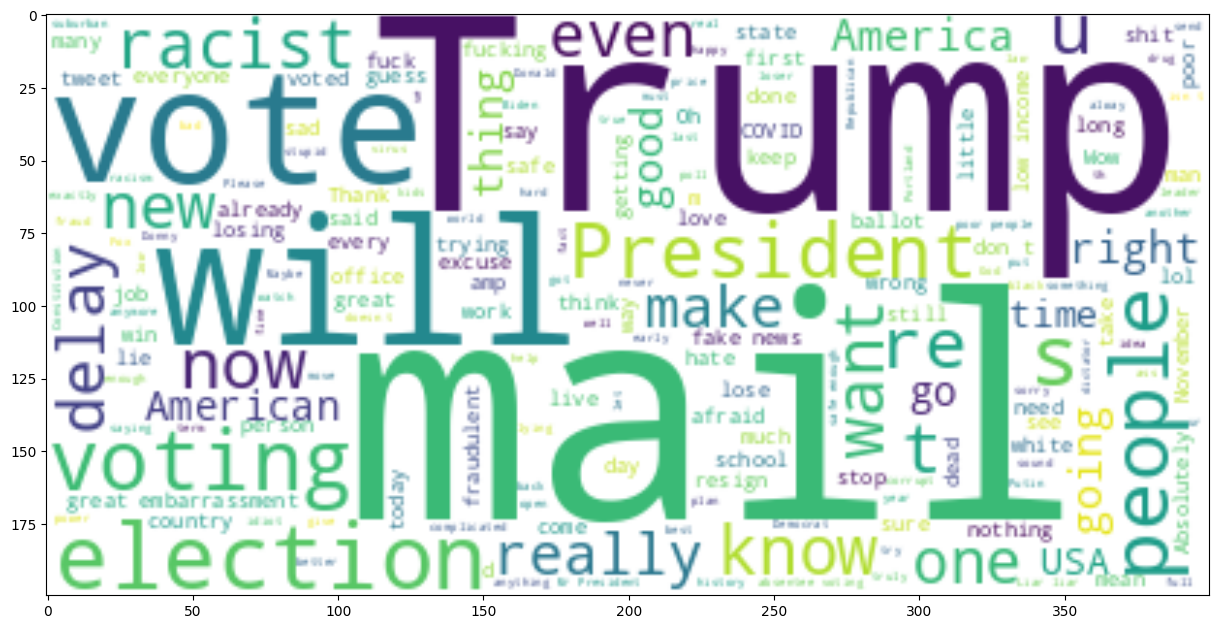

In [71]:
text=" ".join(text for text in trump.text)
text=" ".join(filter(lambda x:x[0]!='@', text.split()))
import re
text=re.sub(r"http\S+", "", text)


print("there have{} words in all text".format(len(text)))
WC=WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

plt.figure(figsize =(15,10))
plt.imshow(WC, interpolation='bilinear')

there have84818 words in all text


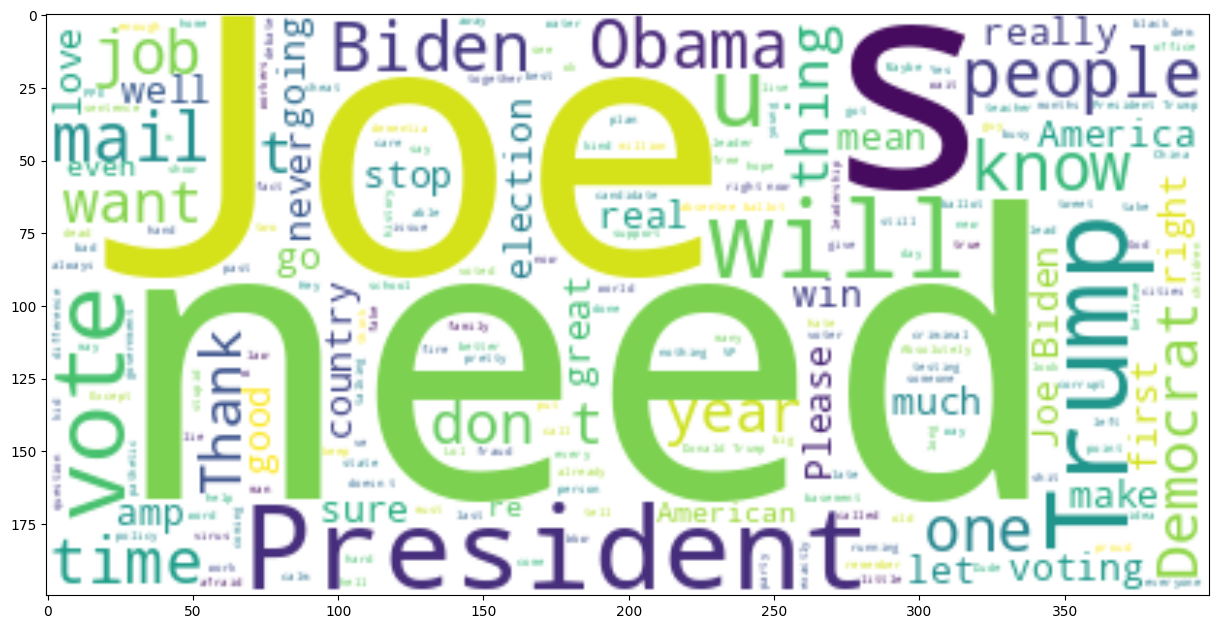

In [72]:
text=" ".join(text for text in biden.text)
text=" ".join(filter(lambda x:x[0]!='@', text.split()))
import re
text=re.sub(r"http\S+", "", text)


print("there have{} words in all text".format(len(text)))
WC=WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

plt.figure(figsize =(15,10))
plt.imshow(WC, interpolation='bilinear')